<a href="https://colab.research.google.com/github/presetprogrammer/SeabornProject419/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project

> Created by George Yergey & Jim Heathcock

#### General Imports

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

## Supervised Learning

In [1]:
#Supervised Imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Linear Regression

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.dropna()
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2333883.1792799835
R-squared: 0.853185544894256
Coefficients: [7873.05329205 -150.40764283 -106.41813265]
Intercept: 13056.321710255172


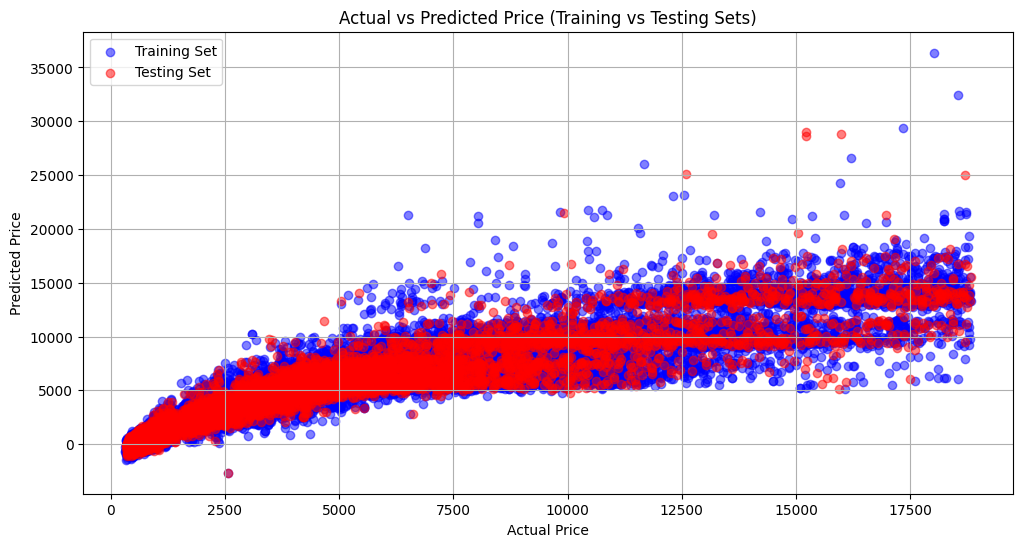

In [6]:
#Linear Regression Scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(y_train, model.predict(X_train), color='blue', alpha=0.5, label='Training Set')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Testing Set')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Training vs Testing Sets)')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest Classifier

In [7]:
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.dropna()
diamonds['price_category'] = pd.cut(diamonds['price'],
                                   bins=[0, 2500, 5000, diamonds['price'].max()],
                                   labels=['Low', 'Medium', 'High'])
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.84      0.87      0.85      2877
         Low       0.94      0.94      0.94      5511
      Medium       0.70      0.68      0.69      2400

    accuracy                           0.86     10788
   macro avg       0.83      0.83      0.83     10788
weighted avg       0.86      0.86      0.86     10788



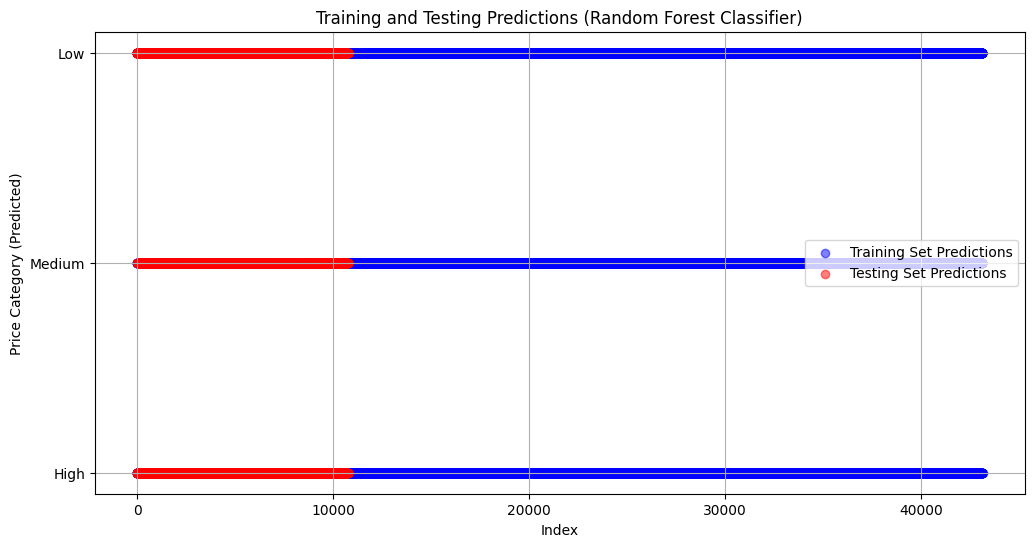

In [8]:
#Random Forest Classifier
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), classifier.predict(X_train), color='blue', alpha=0.5, label='Training Set Predictions')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='Testing Set Predictions')
plt.xlabel('Index')
plt.ylabel('Price Category (Predicted)')
plt.title('Training and Testing Predictions (Random Forest Classifier)')
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrices

0
0


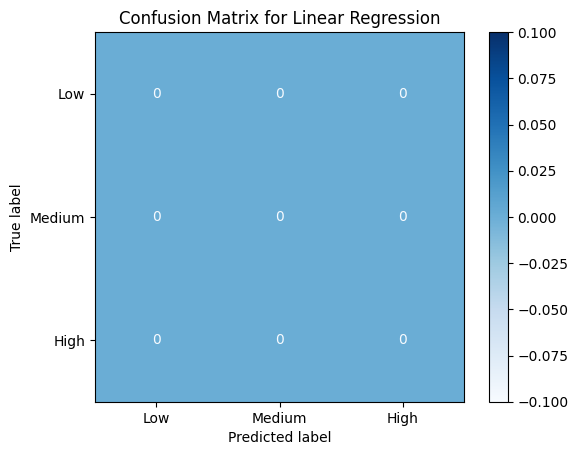

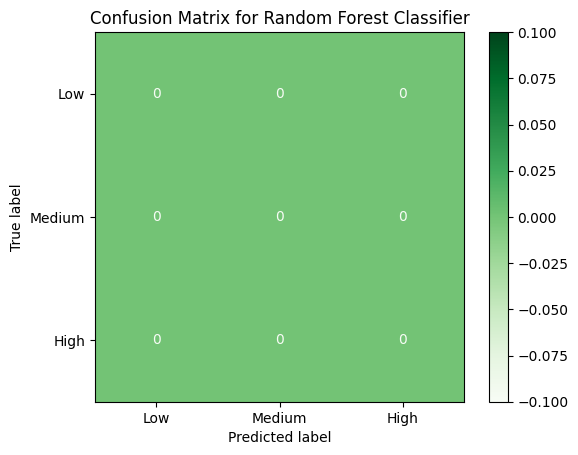

In [15]:
#Performance Measuring: Linear Regression
diamonds = sns.load_dataset('diamonds')
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

# TEMP
print(y_pred.size)
print(y_test.size)

y_test = y_test.dropna()
y_pred = y_pred[~np.isnan(y_pred)]

# TEMP
print(y_pred.size)
print(y_test.size)

bins = [0, 2500, 5000, diamonds['price'].max()]
categories = ['Low', 'Medium', 'High']
y_test_categories = pd.cut(y_test, bins=bins, labels=categories)
y_pred_categories = pd.cut(y_pred, bins=bins, labels=categories)
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Linear Regression")
plt.show()

#Performance Measuring: Random Forest
cm_rf = confusion_matrix(y_test, y_pred, labels=categories)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=categories)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [13]:
print(f"y_test: {type(y_test)}")
print(f"y_pred: {type(y_pred)}")

y_test: <class 'pandas.core.series.Series'>
y_pred: <class 'numpy.ndarray'>


## Unsupervised Learning

#### Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

### Purpose:

* Find clusters coorelating the carat and cut with price

\
Due to the size of the dataset, a random sample will be used for the dataset.

\
The algorithms used will be:

* OPTICS
* k-Means
* DBSCAN
* Gaussian-Mixture Model

\

#### Fetch and modify Diamonds dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

temp = sns.load_dataset("diamonds")
diamonds = temp.dropna()
diamonds.head()

#Encode Cut to Integer
encoder = LabelEncoder()
tempdiamond = diamonds[['carat', 'cut', 'price']]
diamond = tempdiamond.sample(200)
diamond['cut'] = encoder.fit_transform(diamond['cut'])

#### Build Plot

Builds a decision boundary for algorithms with centroids

In [ ]:
def plot_data(X, size):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=size)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, size=2):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, size)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

### DBSCAN

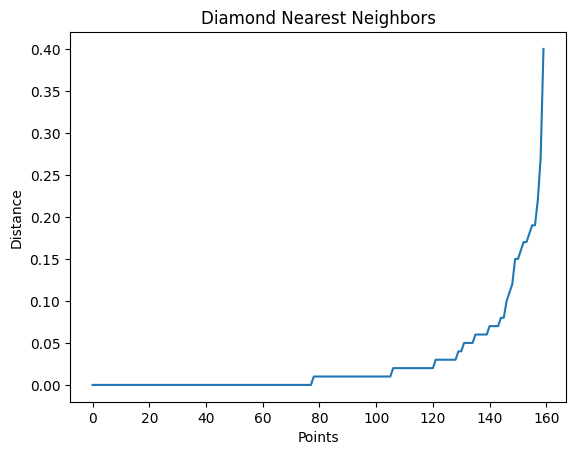

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamond.drop("price", axis=1), diamond["price"], test_size=0.2, random_state=445)

# Estimate epsilon via NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Diamond Nearest Neighbors")
plt.show()

dbscan = DBSCAN(eps=0.18, min_samples=4)
clusters = dbscan.fit_predict(X_train)

#### Dimensionality Reduction

Dimensionality reduction model used for the algorithms is t-distributed Stochastic Neighbor Embedding. The model is most likely to create

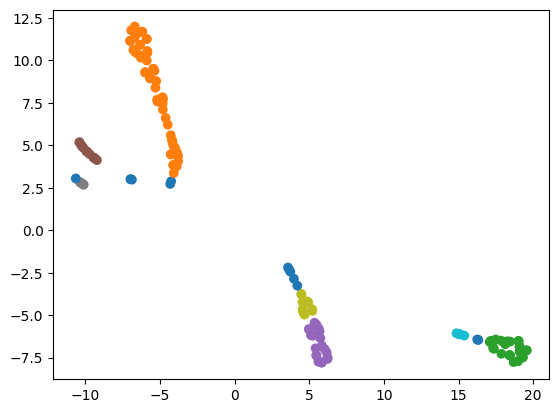

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=445).fit_transform(X_train)
tsne.shape
plt.scatter(tsne[:, 0], tsne[:, 1], c=clusters, cmap="tab10")
plt.show()

### OPTICS

In [ ]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=3)
optics.fit(X_train)
optics_labels = optics.fit_predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


### k-Means Clustering

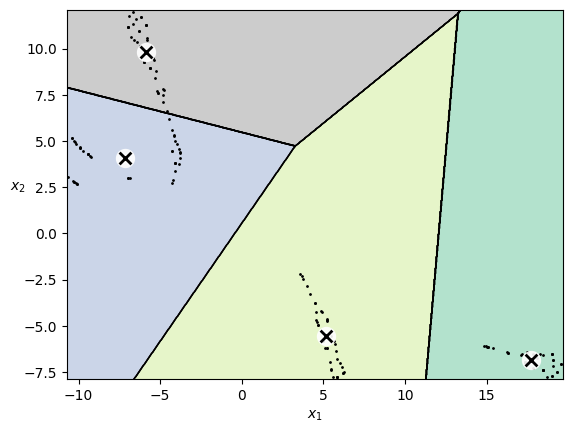

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='random', random_state=445)
kmeans.fit(tsne)
plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.labels_, cmap="viridis")
plot_decision_boundaries(kmeans, tsne)
plt.show()

As visible, KMeans did not give an accurate prediction

### Gausian Mixture Model

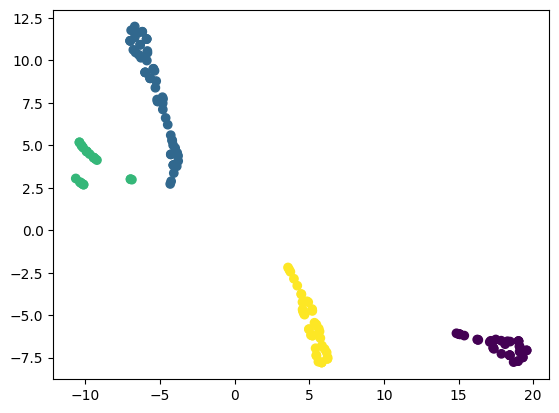

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=445)
gmm.fit(X_train)
gmm_labels = gmm.predict(X_train)

plt.scatter(tsne[:, 0], tsne[:, 1], c=gmm_labels, cmap="viridis")
plt.show()